In [14]:
!pip install wordcloud

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


All libraries imported successfully.


In [3]:
df = pd.read_csv("all_airline_reviews_full.csv")


In [4]:
df.shape

(1603, 4)

In [5]:
df.head()

,Airline,Rating,Review,Verification
0,air-india,1,"Worst airline ever. Delayed my flight 8 hours,...",Not Verified
1,air-india,2,No vegetarian meal available even after pre bo...,Trip Verified
2,air-india,1,I booked a $5000 business class ticket and the...,Trip Verified
3,air-india,1,Had flights with Air India from Melbourne to N...,Trip Verified
4,air-india,1,This has been my worst with an airline ever. I...,Trip Verified


In [6]:
df.info

<bound method DataFrame.info of                 Airline  Rating  \
0             air-india       1   
1             air-india       2   
2             air-india       1   
3             air-india       1   
4             air-india       1   
...                 ...     ...   
1598  air-india-express       4   
1599  air-india-express       3   
1600  air-india-express       4   
1601  air-india-express       3   
1602  air-india-express       4   

                                                 Review   Verification  
0     Worst airline ever. Delayed my flight 8 hours,...   Not Verified  
1     No vegetarian meal available even after pre bo...  Trip Verified  
2     I booked a $5000 business class ticket and the...  Trip Verified  
3     Had flights with Air India from Melbourne to N...  Trip Verified  
4     This has been my worst with an airline ever. I...  Trip Verified  
...                                                 ...            ...  
1598  DXB-IXE. Boarded with apprehen

In [10]:
df = pd.read_csv("all_airline_reviews_full.csv")

def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating <= 6:
        return 'neutral'
    else:
        return 'positive'

df['Sentiment'] = df['Rating'].apply(map_sentiment)
print("Data loaded. Here's the balance of your new 'Sentiment' column:")
print(df['Sentiment'].value_counts())

Data loaded. Here's the balance of your new 'Sentiment' column:
Sentiment
negative    846
positive    468
neutral     289
Name: count, dtype: int64


In [11]:
df.head()

,Airline,Rating,Review,Verification,Sentiment
0,air-india,1,"Worst airline ever. Delayed my flight 8 hours,...",Not Verified,negative
1,air-india,2,No vegetarian meal available even after pre bo...,Trip Verified,negative
2,air-india,1,I booked a $5000 business class ticket and the...,Trip Verified,negative
3,air-india,1,Had flights with Air India from Melbourne to N...,Trip Verified,negative
4,air-india,1,This has been my worst with an airline ever. I...,Trip Verified,negative


In [12]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    words = text.split() 
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(cleaned_words)

print("Cleaning all reviews... This may take a moment...")
df['Cleaned_Review'] = df['Review'].apply(clean_text)

print("Text cleaning complete!")
display(df[['Review', 'Cleaned_Review']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Cleaning all reviews... This may take a moment...
Text cleaning complete!


,Review,Cleaned_Review
0,"Worst airline ever. Delayed my flight 8 hours,...",worst airline ever delayed flight hour sent no...
1,No vegetarian meal available even after pre bo...,vegetarian meal available even pre booking sea...
2,I booked a $5000 business class ticket and the...,booked business class ticket changed schedule ...
3,Had flights with Air India from Melbourne to N...,flight air india melbourne new delhi new delhi...
4,This has been my worst with an airline ever. I...,worst airline ever spent hour looking reasonab...


Generating WordClouds...


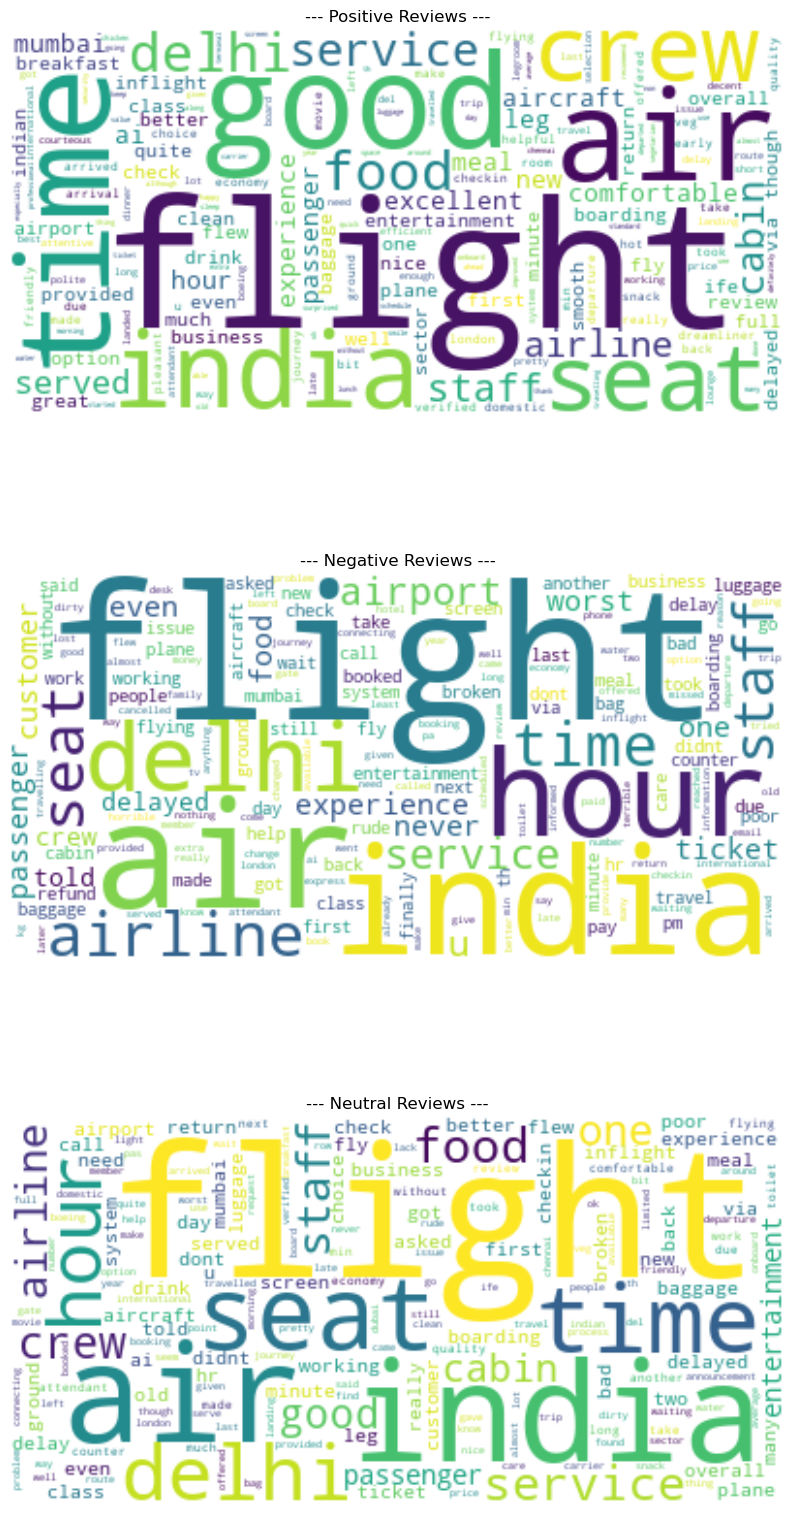

In [13]:

print("Generating WordClouds...")

positive_text = " ".join(review for review in df[df['Sentiment'] == 'positive']['Cleaned_Review'])
negative_text = " ".join(review for review in df[df['Sentiment'] == 'negative']['Cleaned_Review'])
neutral_text = " ".join(review for review in df[df['Sentiment'] == 'neutral']['Cleaned_Review'])

wc_positive = WordCloud(background_color="white", collocations=False).generate(positive_text)
wc_negative = WordCloud(background_color="white", collocations=False).generate(negative_text)
wc_neutral = WordCloud(background_color="white", collocations=False).generate(neutral_text)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))

ax1.imshow(wc_positive, interpolation='bilinear')
ax1.set_title("--- Positive Reviews ---")
ax1.axis("off") 
ax2.imshow(wc_negative, interpolation='bilinear')
ax2.set_title("--- Negative Reviews ---")
ax2.axis("off")

ax3.imshow(wc_neutral, interpolation='bilinear')
ax3.set_title("--- Neutral Reviews ---")
ax3.axis("off")


plt.show()

In [14]:

X = df['Cleaned_Review']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

print("Text converted to vectors ")

Text converted to vectors 


In [15]:
print("Training Logistic Regression model...")
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)


Training Logistic Regression model...


LogisticRegression(max_iter=1000)

In [16]:
print("Training Naive Bayes model...")
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)



Training Naive Bayes model...


MultinomialNB()

In [17]:
print("Training Random Forest model... ")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf, y_train)



Training Random Forest model... 


RandomForestClassifier(random_state=42)

In [21]:

print("Making predictions on the test data...")
y_pred_lr = model_lr.predict(X_test_tfidf)
y_pred_nb = model_nb.predict(X_test_tfidf)
y_pred_rf = model_rf.predict(X_test_tfidf)

print("1. Logistic Regression Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr) * 100:.2f}%")
print(classification_report(y_test, y_pred_lr))

print("2. Naive Bayes Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb) * 100:.2f}%")
print(classification_report(y_test, y_pred_nb))

print("3. Random Forest Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))

Making predictions on the test data...
1. Logistic Regression Report ---
Accuracy: 77.26%
              precision    recall  f1-score   support

    negative       0.80      0.97      0.87       173
     neutral       0.56      0.08      0.14        63
    positive       0.75      0.89      0.81        85

    accuracy                           0.77       321
   macro avg       0.70      0.65      0.61       321
weighted avg       0.73      0.77      0.71       321

2. Naive Bayes Report ---
Accuracy: 74.77%
              precision    recall  f1-score   support

    negative       0.74      0.99      0.85       173
     neutral       0.00      0.00      0.00        63
    positive       0.77      0.80      0.79        85

    accuracy                           0.75       321
   macro avg       0.50      0.60      0.54       321
weighted avg       0.60      0.75      0.66       321

3. Random Forest Report ---
Accuracy: 74.45%
              precision    recall  f1-score   support

    n

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
